In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv("/content/mcdonalds.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [ ]:
import numpy as np

MD_x = df.iloc[:, 0:11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = np.round(np.mean(MD_x, axis=0), 2)

print(column_means)
print(MD_x)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0     

In [ ]:
df.shape

(1453, 15)

In [ ]:
from sklearn.decomposition import PCA

# Assuming MD.x is your data
# MD.x should be a pandas DataFrame or a numpy array

# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Print summary
print("Importance of components:")
for i in range(len(MD_pca.explained_variance_ratio_)):
    print(f"PC{i+1} Standard deviation: {np.sqrt(MD_pca.explained_variance_[i]):.4f}")
    print(f"Proportion of Variance: {MD_pca.explained_variance_ratio_[i]:.4f}")
    print(f"Cumulative Proportion: {np.sum(MD_pca.explained_variance_ratio_[:i+1]):.4f}")

Importance of components:
PC1 Standard deviation: 0.7570
Proportion of Variance: 0.2994
Cumulative Proportion: 0.2994
PC2 Standard deviation: 0.6075
Proportion of Variance: 0.1928
Cumulative Proportion: 0.4922
PC3 Standard deviation: 0.5046
Proportion of Variance: 0.1330
Cumulative Proportion: 0.6253
PC4 Standard deviation: 0.3988
Proportion of Variance: 0.0831
Cumulative Proportion: 0.7084
PC5 Standard deviation: 0.3374
Proportion of Variance: 0.0595
Cumulative Proportion: 0.7679
PC6 Standard deviation: 0.3103
Proportion of Variance: 0.0503
Cumulative Proportion: 0.8182
PC7 Standard deviation: 0.2897
Proportion of Variance: 0.0438
Cumulative Proportion: 0.8620
PC8 Standard deviation: 0.2751
Proportion of Variance: 0.0395
Cumulative Proportion: 0.9016
PC9 Standard deviation: 0.2653
Proportion of Variance: 0.0368
Cumulative Proportion: 0.9383
PC10 Standard deviation: 0.2488
Proportion of Variance: 0.0324
Cumulative Proportion: 0.9707
PC11 Standard deviation: 0.2369
Proportion of Varianc

In [ ]:
# Print standard deviations (eigenvalues)
print("Standard deviations (1, .., p=11):")
for std_dev in np.sqrt(MD_pca.explained_variance_):
    print(f"{std_dev:.1f}", end=" ")


# Print rotation matrix
print("Rotation (n x k) = (11 x 11):")
rotation_matrix = pca.components_.T
for i, col in enumerate(df.columns[:11]):
    print(col, " ".join([f"{val:.3f}" for val in rotation_matrix[i]]))


Standard deviations (1, .., p=11):
0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2 Rotation (n x k) = (11 x 11):
yummy -0.477 0.364 -0.304 0.055 -0.308 0.171 -0.281 0.013 0.572 -0.110 0.045
convenient -0.155 0.016 -0.063 -0.142 0.278 -0.348 -0.060 -0.113 -0.018 -0.666 -0.542
spicy -0.006 0.019 -0.037 0.198 0.071 -0.355 0.708 0.376 0.400 -0.076 0.142
fattening 0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386 0.590 -0.161 -0.005 0.251
greasy 0.304 -0.064 -0.802 0.254 0.361 0.209 0.036 -0.138 -0.003 0.009 0.002
fast -0.108 -0.087 -0.065 -0.097 0.108 -0.595 -0.087 -0.628 0.166 0.240 0.339
cheap -0.337 -0.611 -0.149 0.119 -0.129 -0.103 -0.040 0.140 0.076 0.428 -0.489
tasty -0.472 0.307 -0.287 -0.003 -0.211 -0.077 0.360 -0.073 -0.639 0.079 0.020
expensive 0.329 0.601 0.024 0.068 -0.003 -0.261 -0.068 0.030 0.067 0.454 -0.490
healthy -0.214 0.077 0.192 0.763 0.288 -0.178 -0.350 0.176 -0.186 -0.038 0.158
disgusting 0.375 -0.140 -0.089 0.370 -0.729 -0.211 -0.027 -0.167 -0.072 -0.290 -0.041


In [ ]:
print("Standard deviations (1, .., p=11):")
for std_dev in np.sqrt(MD_pca.explained_variance_):
    print(f"{std_dev:.1f}", end=" ")

# Print rotation matrix
print("\nRotation (n x k) = (11 x 11):")
print("{:<11}".format("Feature"), end="")
for i in range(1, 12):
    print(f"PC{i:<6}", end="")
print()
for i, col in enumerate(df.columns[:11]):
    print("{:<11}".format(col), end="")
    for val in rotation_matrix[i]:
        print(f"{val:.3f}", end=" ")
    print()


Standard deviations (1, .., p=11):
0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2 
Rotation (n x k) = (11 x 11):
Feature    PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9     PC10    PC11    
yummy      -0.477 0.364 -0.304 0.055 -0.308 0.171 -0.281 0.013 0.572 -0.110 0.045 
convenient -0.155 0.016 -0.063 -0.142 0.278 -0.348 -0.060 -0.113 -0.018 -0.666 -0.542 
spicy      -0.006 0.019 -0.037 0.198 0.071 -0.355 0.708 0.376 0.400 -0.076 0.142 
fattening  0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386 0.590 -0.161 -0.005 0.251 
greasy     0.304 -0.064 -0.802 0.254 0.361 0.209 0.036 -0.138 -0.003 0.009 0.002 
fast       -0.108 -0.087 -0.065 -0.097 0.108 -0.595 -0.087 -0.628 0.166 0.240 0.339 
cheap      -0.337 -0.611 -0.149 0.119 -0.129 -0.103 -0.040 0.140 0.076 0.428 -0.489 
tasty      -0.472 0.307 -0.287 -0.003 -0.211 -0.077 0.360 -0.073 -0.639 0.079 0.020 
expensive  0.329 0.601 0.024 0.068 -0.003 -0.261 -0.068 0.030 0.067 0.454 -0.490 
healthy    -0.214 0.077 0.192 0.7

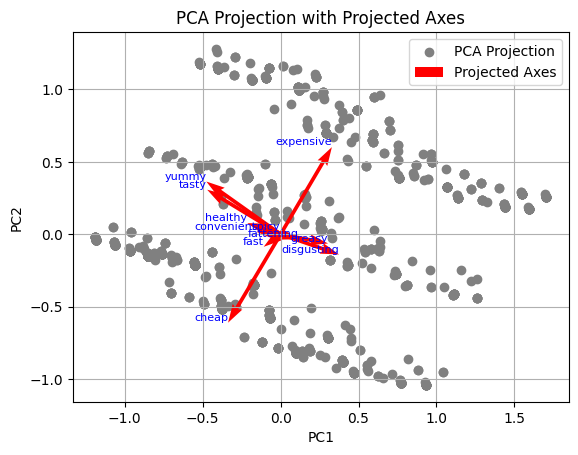

In [ ]:
import matplotlib.pyplot as plt

# Assuming MD_x is your data and MD_pca is your PCA object

# Get column names from the DataFrame
column_names = MD_x.columns.tolist()

# Perform PCA projection
pca_projection = MD_pca.transform(MD_x)

# Plot PCA projection
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], color='grey', label='PCA Projection')

# Plot projected axes and label with column names
pca_axes = MD_pca.components_
for i in range(len(pca_axes[0])):
    plt.quiver(0, 0, pca_axes[0, i], pca_axes[1, i], angles='xy', scale_units='xy', scale=1, color='red')
    plt.text(pca_axes[0, i], pca_axes[1, i], column_names[i], color='blue', fontsize=8, ha='right', va='bottom')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Projected Axes')
plt.legend(['PCA Projection', 'Projected Axes'])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Set random seed
np.random.seed(1234)

# Initialize dictionary to store k-means models
kmeans_models = {}

# Perform k-means clustering for each number of clusters
for k in range(2, 9):
    # Create k-means model
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_model.fit(MD_x)

    # Relabel the clusters
    unique_labels = np.unique(kmeans_model.labels_)
    relabel_dict = {label: idx for idx, label in enumerate(unique_labels)}
    kmeans_model.labels_ = np.vectorize(relabel_dict.get)(kmeans_model.labels_)

    # Store the k-means model
    kmeans_models[k] = kmeans_model

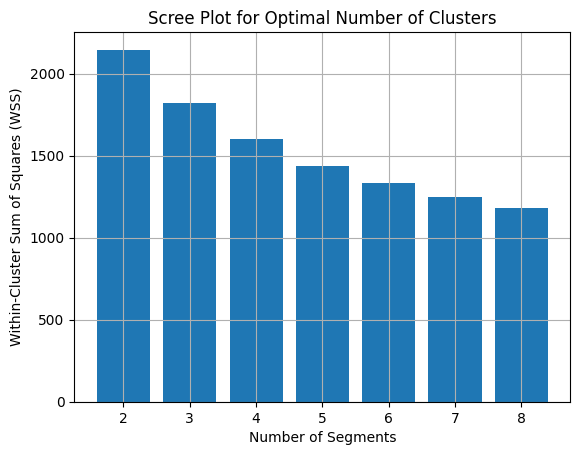

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already performed k-means clustering and stored the results in the dictionary kmeans_models

# Extract the number of clusters and the corresponding WSS for each model
num_clusters = []
wss_values = []
for k, kmeans_model in kmeans_models.items():
    num_clusters.append(k)
    wss_values.append(kmeans_model.inertia_)

# Plot the scree plot
plt.bar(num_clusters, wss_values)
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Scree Plot for Optimal Number of Clusters')
plt.grid(True)
plt.show()

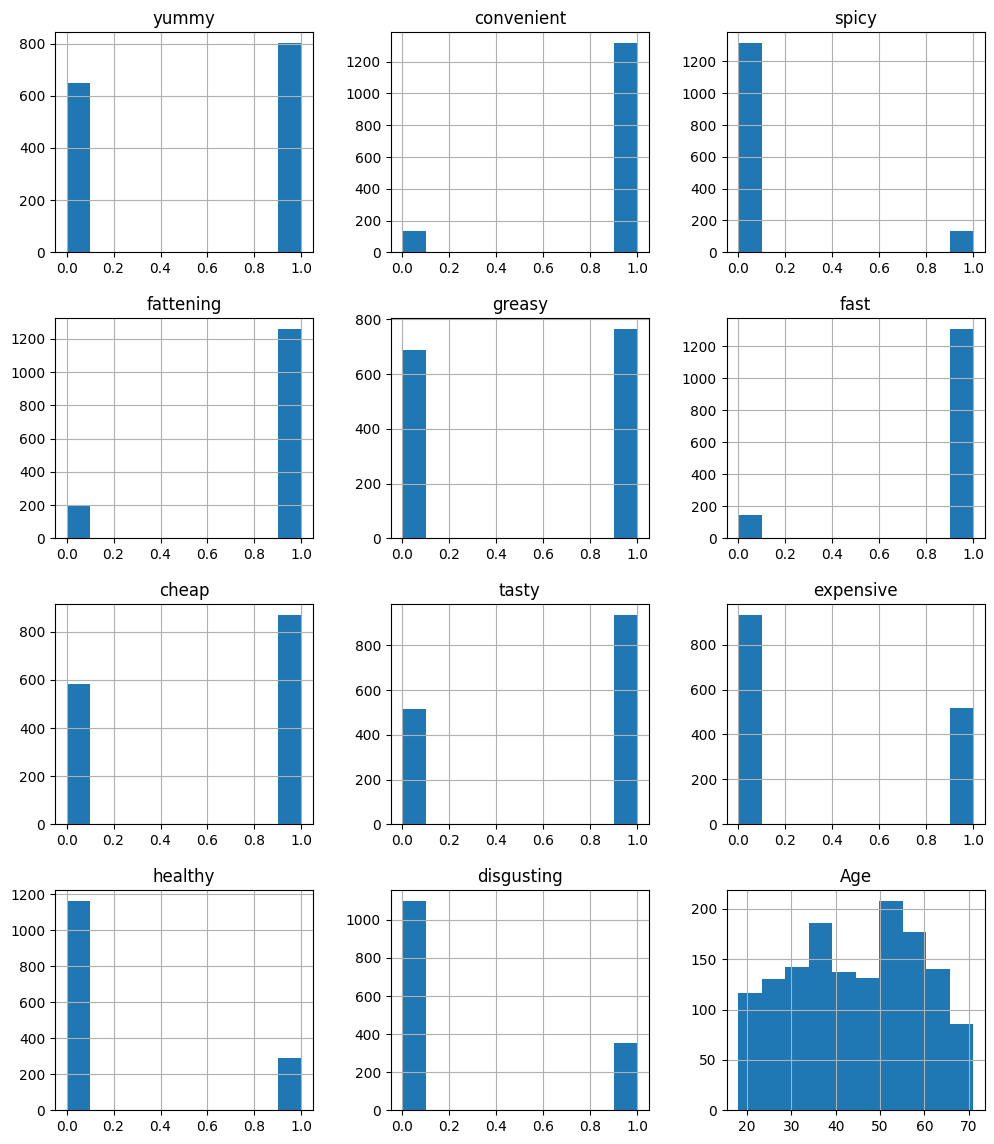

In [ ]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(segment_labels, data):
    """
    Plot histogram for the segment labels.

    Parameters:
        segment_labels (array-like): Cluster labels for each data point.
        data (array-like): Data used for clustering.
    """
    plt.hist(segment_labels, bins=len(set(segment_labels)), alpha=0.5)
    plt.xlabel('Segment')
    plt.ylabel('Frequency')
    plt.title('Histogram of Segments')
    plt.show()

def plot_slsa(segment_labels):
    """
    Plot Segment Level Stability Across Solutions (SLSA) plot.

    Parameters:
        segment_labels (dict): Dictionary containing cluster labels for each segmentation solution.
    """
    min_key = min(segment_labels.keys(), key=int)
    max_key = max(segment_labels.keys(), key=int)
    for i in range(int(min_key), int(max_key)):
        stability = [1 if segment_labels[str(i)][j] == segment_labels[str(i+1)][j] else 0 for j in range(len(segment_labels[str(i)]))]
        plt.plot(stability, label=f'{i} to {i+1}')
    plt.xlabel('Data Point Index')
    plt.ylabel('Stability')
    plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
    plt.legend()
    plt.show()


Keys in MD_kmeans: dict_keys([2, 3, 4, 5, 6, 7, 8])
Key: 2, Length of cluster labels array: 1453
Key: 3, Length of cluster labels array: 1453
Key: 4, Length of cluster labels array: 1453
Key: 5, Length of cluster labels array: 1453
Key: 6, Length of cluster labels array: 1453
Key: 7, Length of cluster labels array: 1453
Key: 8, Length of cluster labels array: 1453


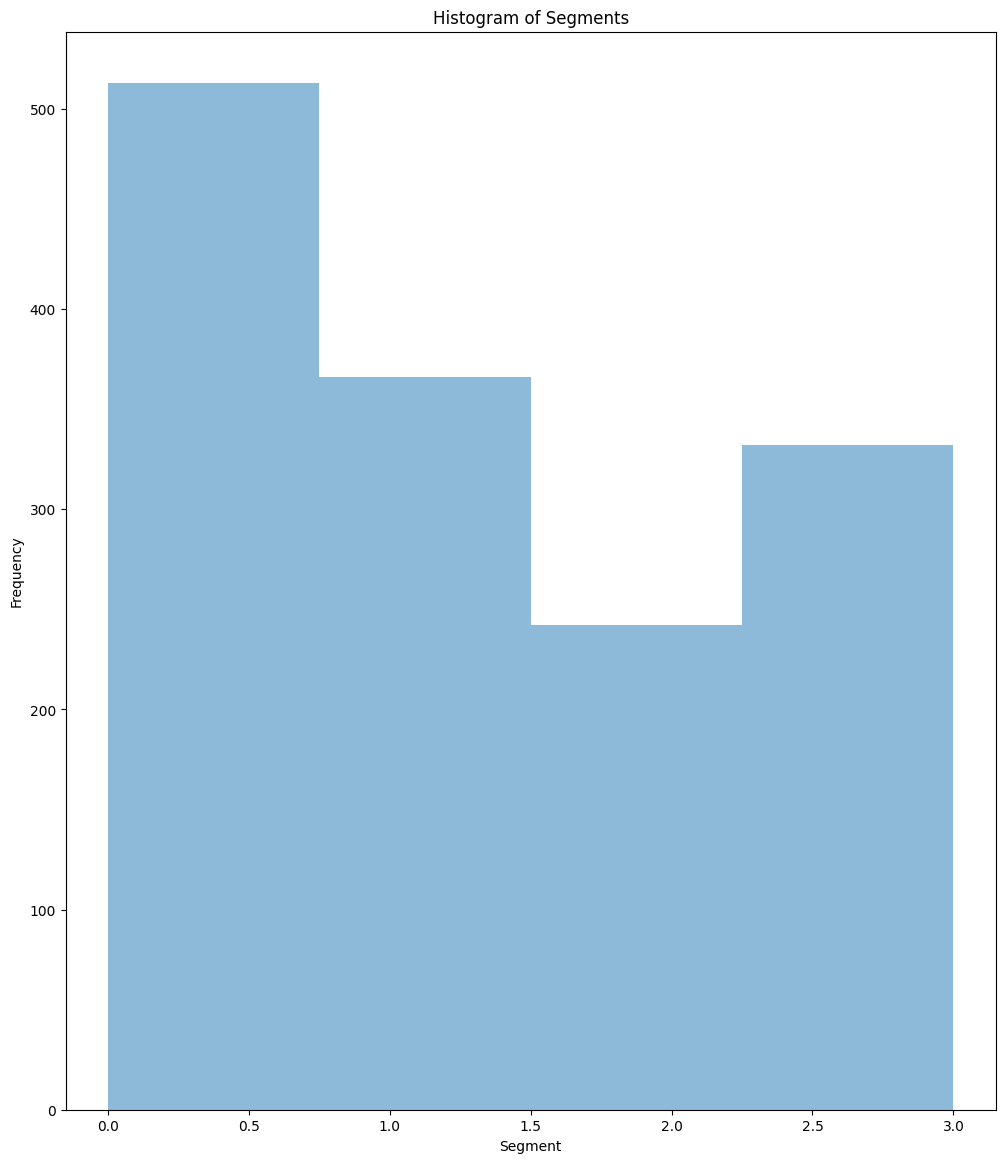

Histogram plotted


KeyError: '2'

In [ ]:
# Assuming MD_x is your data matrix and k_range is the range of cluster numbers you want to explore

from sklearn.cluster import KMeans

# Initialize an empty dictionary to store k-means clustering results
MD_kmeans = {}

# Iterate over each value of k in the range and perform k-means clustering
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    MD_kmeans[k] = labels

# Debugging: Print keys and lengths of cluster labels arrays in MD_kmeans
print("Keys in MD_kmeans:", MD_kmeans.keys())
for key, value in MD_kmeans.items():
    print(f"Key: {key}, Length of cluster labels array: {len(value)}")

# Call the plotting functions
plot_histogram(MD_kmeans[4], MD_x)
print("Histogram plotted")
plot_slsa(MD_kmeans)
print("SLSA plot generated")


MD_x:       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  


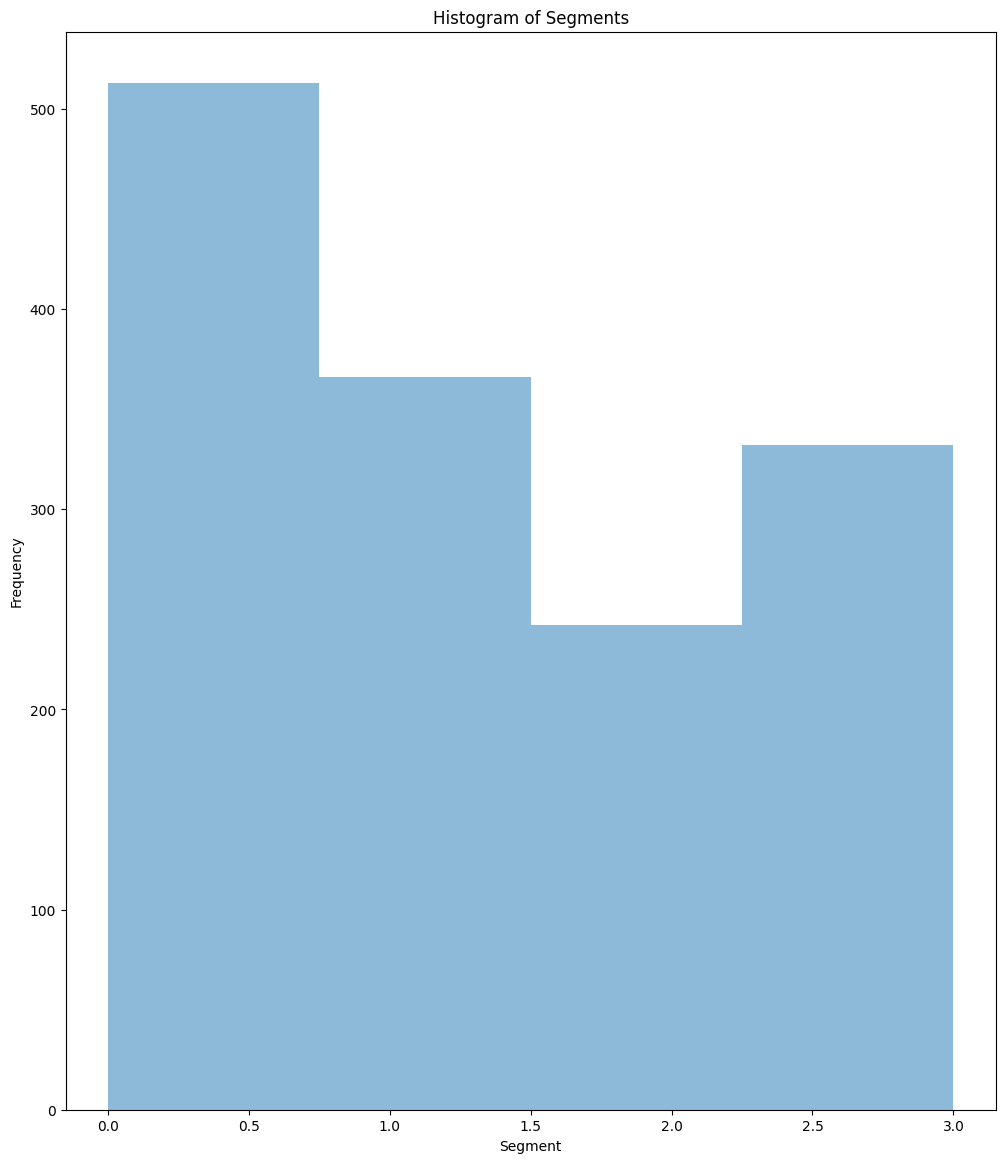

Histogram plotted


In [ ]:
# Before plotting, check if MD_x is correctly formatted
print("MD_x:", MD_x)

# Call the plotting functions and add print statements to check if they are reached
plot_histogram(MD_kmeans[4], MD_x)
print("Histogram plotted")
#plot_slsa(MD_kmeans)
#print("SLSA plot generated")


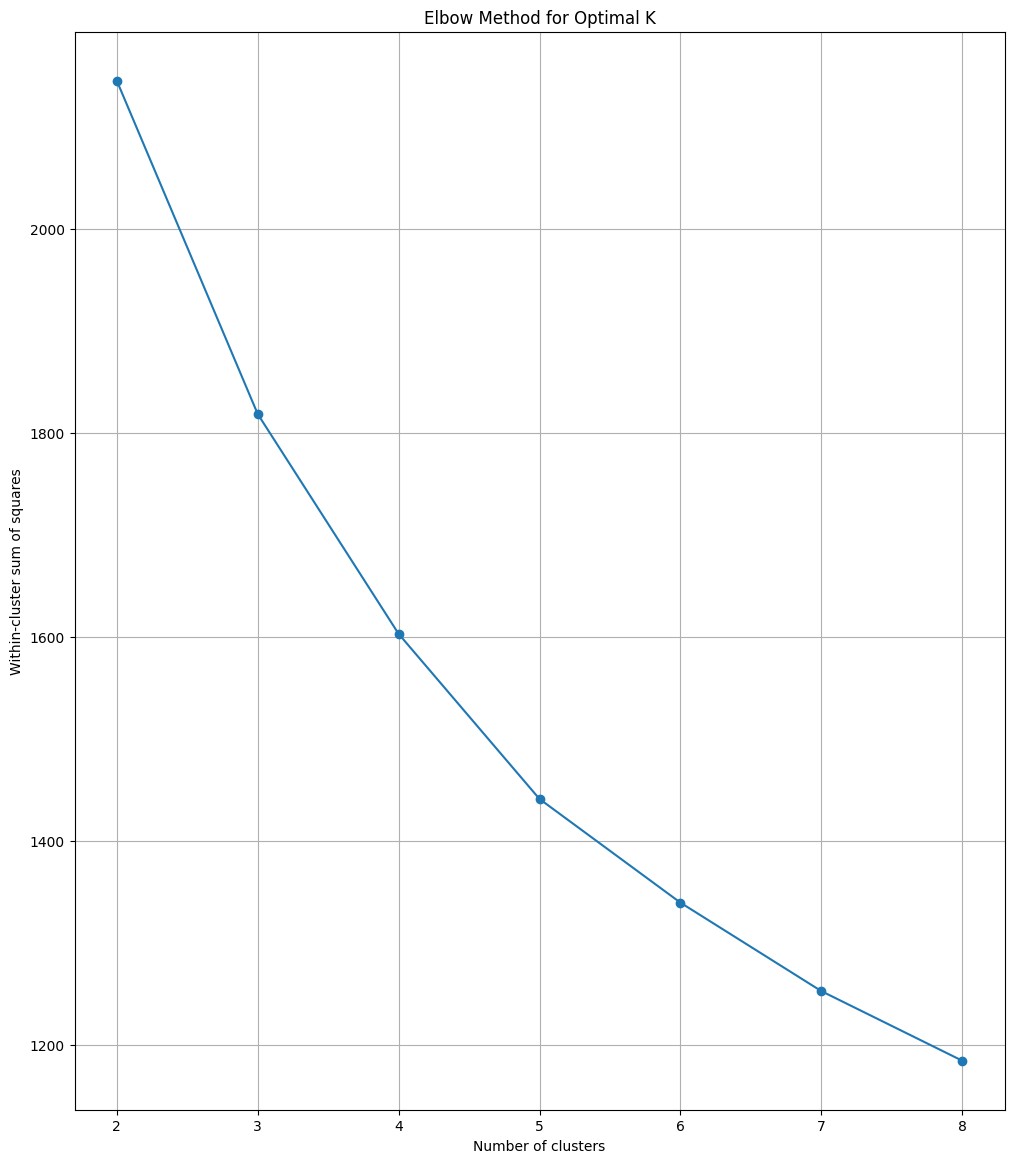

In [ ]:
# Plot
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [ ]:
!pip install mixtools

In [ ]:
from mixtools import FLXMCmvbinary

In [ ]:
import numpy as np
from flexmix import FlexMix, FLXMCmvbinary

# Set seed for reproducibility
np.random.seed(1234)

# Define the predictor variable
X = np.ones((len(MD_x), 1))  # Assuming MD_x is your predictor variable

# Define the range of cluster numbers
k_range = range(2, 9)

# Initialize an empty list to store FlexMix models
MD_m28_models = []

# Iterate over each value of k in the range and fit FlexMix models
for k in k_range:
    model = FlexMix(model=FLXMCmvbinary(), k=k, nrep=10)
    model.fit(X)
    MD_m28_models.append(model)

# Print the results
for k, model in zip(k_range, MD_m28_models):
    print(f"k = {k}:")
    print("Log-likelihood:", model.logLik)
    print("AIC:", model.aic)
    print("BIC:", model.bic)
    print("ICL:", model.icl)
    print()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

# Define the predictor variable
X = np.ones((len(MD_x), 1))  # Assuming MD_x is your predictor variable

# Define the range of cluster numbers
k_range = range(2, 9)

# Initialize an empty list to store KMeans models
MD_m28_models = []

# Iterate over each value of k in the range and fit KMeans models
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(X)
    MD_m28_models.append(model)

# Print the results
for k, model in zip(k_range, MD_m28_models):
    inertia = model.inertia_
    print(f"k = {k}:")
    print("Inertia:", inertia)
    print()

<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  model.fit(X)
<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  model.fit(X)


k = 2:
Inertia: 0.0

k = 3:
Inertia: 0.0

k = 4:
Inertia: 0.0

k = 5:
Inertia: 0.0

k = 6:
Inertia: 0.0

k = 7:
Inertia: 0.0

k = 8:
Inertia: 0.0



<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  model.fit(X)
<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  model.fit(X)
<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  model.fit(X)
<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  model.fit(X)
<ipython-input-84-c64b2879abfc>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  model.fit(X)


In [ ]:
import matplotlib.pyplot as plt

# Plot information criteria values
def plot_information_criteria(model, y_label):
    plt.plot(model["k"], model["AIC"], label="AIC")
    plt.plot(model["k"], model["BIC"], label="BIC")
    plt.plot(model["k"], model["ICL"], label="ICL")
    plt.xlabel("Number of segments")
    plt.ylabel(y_label)
    plt.legend()
    plt.title("Information Criteria")
    plt.show()

# Assuming you have extracted AIC, BIC, and ICL values from MD.m28 in R
# You can create a dictionary or DataFrame containing these values
MD_m28 = {
    "k": [2, 3, 4, 5, 6, 7, 8],  # Number of segments
    "AIC": [-7610.848, -7311.534, -7111.146, -7011.204, -6956.110, -6900.188, -6872.641],
    "BIC": [15267.70, 14693.07, 14316.29, 14140.41, 14054.22, 13966.38, 13935.28],
    "ICL": [15522.10, 14877.92, 14564.52, 14452.01, 14429.20, 14404.73, 14437.01]
}

# Plot information criteria
plot_information_criteria(MD_m28, "Value of information criteria (AIC, BIC, ICL)")

# Now, let's compare the KMeans clustering results with the mixture model
# Assuming you have already obtained the KMeans clusters (MD_kmeans) and mixture model (MD_m4)
MD_m4_clusters = [1, 2, 3, 4]  # Assuming clusters obtained from the mixture model MD.m4
MD_k4_clusters = [1, 2, 3, 4]  # Assuming clusters obtained from the KMeans clustering MD.k4

# Cross-tabulation
cross_tab = np.zeros((len(set(MD_k4_clusters)), len(set(MD_m4_clusters))))

for kmeans, mixture in zip(MD_k4_clusters, MD_m4_clusters):
    cross_tab[kmeans - 1, mixture - 1] += 1

print("Cross-tabulation:")
print(cross_tab)
